<h1 style = "color : Brown"> Telecom Churn Group Case Study</h1>

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.


<h2 style = "color : Brown"> Problem Statement</h2>

In this competition, your goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.

<h2 style = "color : Brown"> Objectives</h2>

The main goal of the case study is to build ML models to predict churn. The predictive model that you’re going to build will the following purposes:

    1. It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

    2. It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

    3. Even though overall accuracy will be your primary evaluation metric, you should also mention other metrics like precision, recall, etc. for the different models that can be used for evaluation purposes based on different business objectives. For example, in this problem statement, one business goal can be to build an ML model that identifies customers who'll definitely churn with more accuracy as compared to the ones who'll not churn. Make sure you mention which metric can be used in such scenarios.

    4. Recommend strategies to manage customer churn based on your observations.

<h2 style = "color : Brown"> Importing Necessary Libraries</h2>

In [1]:
#import the necessary libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE

<h2 style = "color : Brown"> Read the dataset</h2>
We will read the data using read_csv() function of pandas library

In [2]:
# Loading the datasets
df_telecom_churn=pd.read_csv('train (1).csv')
df_telecom_churn_test=pd.read_csv('test (1).csv')

<h2 style = "color : Brown"> Data Exploration</h2>
We will look for 5 top rows using head() function

In [3]:
#Looking at the training data
df_telecom_churn.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [4]:
#Looking at the test data
df_telecom_churn_test.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,0,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,0,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,0,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00


In [5]:
# The shape of the dataset
print(df_telecom_churn.shape)
print(df_telecom_churn_test.shape)

(69999, 172)
(30000, 171)


<h2>The `describe()` function will provide us with count, mean, standard deviation (std), min, max, Interquartile range</h2>

In [6]:
#Searching for Missings,type of data and also known the shape of training data
df_telecom_churn.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [7]:
#Searching for Missings,type of data and also known the shape of test data
df_telecom_churn_test.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
count,30000.000000,30000.0,29684.0,29684.0,29684.0,30000.000000,30000.000000,30000.000000,28831.000000,28828.000000,...,30000.000000,30000.000000,30000.000000,7585.000000,7706.000000,7922.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,84998.500000,109.0,0.0,0.0,0.0,282.644348,279.355021,279.845167,130.629693,133.148632,...,0.073467,0.077967,0.082200,0.909954,0.906956,0.891946,1218.023200,68.314097,68.946576,59.891621
std,8660.398374,0.0,0.0,0.0,0.0,314.560212,323.205370,326.437029,290.677420,302.921820,...,0.557327,0.613596,0.611546,0.286267,0.290513,0.310468,960.109844,263.460641,278.749349,246.098292
min,69999.000000,109.0,0.0,0.0,0.0,-185.043000,-2014.045000,-146.859000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000
25%,77498.750000,109.0,0.0,0.0,0.0,92.907500,87.504750,84.180500,7.280000,6.660000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,466.000000,0.000000,0.000000,0.000000
50%,84998.500000,109.0,0.0,0.0,0.0,198.227500,191.775000,191.690500,34.760000,32.550000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,853.000000,0.000000,0.000000,0.000000
75%,92498.250000,109.0,0.0,0.0,0.0,371.969250,365.250750,367.804750,117.170000,115.210000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1795.000000,0.000000,0.000000,0.000000
max,99998.000000,109.0,0.0,0.0,0.0,10955.066000,13224.119000,13505.996000,6944.360000,7411.010000,...,28.000000,35.000000,30.000000,1.000000,1.000000,1.000000,4197.000000,6054.390000,7994.840000,6614.530000


In [8]:
#Searching for Missings,type of data and also known the shape of data
df_telecom_churn.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [9]:
# Checking all numerical information
df_telecom_churn.describe(include='all')

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999,69600,69266,69999.000000,69999.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
unique,NaN,NaN,NaN,NaN,NaN,1,1,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,6/30/2014,7/31/2014,8/31/2014,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,69999,69600,69266,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,34999.000000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,283.134365,278.185912,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,NaN,NaN,NaN,334.213918,344.366927,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,-2258.709000,-1289.715000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,93.581000,86.714000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,197.484000,191.588000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,370.791000,365.369500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000


## Data cleaning

In [10]:
# Checking for any presence of duplicate value in the dataset
df_telecom_churn[df_telecom_churn.duplicated()]

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability


In [11]:
# List of variable names with NA or NaN values 
df_telecom_churn.loc[:,df_telecom_churn.isna().any(axis=0)].columns

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_7', 'last_date_of_month_8', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       ...
       'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8'],
      dtype='object', length=125)

##### Note :There are about 125 elements containing NaN values.

In [12]:
df_telecom_churn.loc[:,df_telecom_churn.isna().any(axis=0)]

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_7,last_date_of_month_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,...,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8
0,0.0,0.0,0.0,7/31/2014,8/31/2014,48.58,124.38,1.29,32.24,96.68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,7/31/2014,8/31/2014,0.00,0.00,0.00,0.00,25.99,...,NaN,NaN,122.08,NaN,NaN,0.0,NaN,NaN,1.0,NaN
2,0.0,0.0,0.0,7/31/2014,8/31/2014,0.53,15.93,0.00,53.99,82.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,7/31/2014,8/31/2014,7.26,16.01,0.00,68.76,78.48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,7/31/2014,8/31/2014,21.28,4.83,6.13,56.99,38.11,...,0.00,0.00,35.12,0.00,0.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,0.0,0.0,0.0,7/31/2014,8/31/2014,0.00,7.36,10.93,0.00,488.46,...,0.00,NaN,60.61,48.00,NaN,0.0,0.0,NaN,1.0,1.0
69995,0.0,0.0,0.0,7/31/2014,8/31/2014,116.54,196.46,232.63,49.53,96.28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69996,0.0,0.0,0.0,7/31/2014,8/31/2014,77.13,68.44,78.44,335.54,227.94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69997,0.0,0.0,0.0,7/31/2014,8/31/2014,14.01,7.64,6.71,30.34,16.68,...,122.08,150.67,212.17,122.07,0.0,0.0,0.0,1.0,1.0,1.0


In [13]:
# checking the percentage of zero values in each element of the train set
df_telecom_churn_null=df_telecom_churn[df_telecom_churn.columns[df_telecom_churn.isnull().any()]].isnull().sum() * 100 / df_telecom_churn.shape[0]
df_telecom_churn_null

loc_og_t2o_mou           1.002871
std_og_t2o_mou           1.002871
loc_ic_t2o_mou           1.002871
last_date_of_month_7     0.570008
last_date_of_month_8     1.047158
                          ...    
night_pck_user_7        74.478207
night_pck_user_8        73.689624
fb_user_6               74.902499
fb_user_7               74.478207
fb_user_8               73.689624
Length: 125, dtype: float64

In [14]:
# checking the percentage of zero values in each element of the test set
df_telecom_churn_null_test=df_telecom_churn[df_telecom_churn.columns[df_telecom_churn.isnull().any()]].isnull().sum() * 100 / df_telecom_churn.shape[0]
df_telecom_churn_null_test

loc_og_t2o_mou           1.002871
std_og_t2o_mou           1.002871
loc_ic_t2o_mou           1.002871
last_date_of_month_7     0.570008
last_date_of_month_8     1.047158
                          ...    
night_pck_user_7        74.478207
night_pck_user_8        73.689624
fb_user_6               74.902499
fb_user_7               74.478207
fb_user_8               73.689624
Length: 125, dtype: float64

In [15]:
# All the features whose value is greater than 30% will be dropped
for column in df_telecom_churn.columns:
    print(column)

id
circle_id
loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
last_date_of_month_6
last_date_of_month_7
last_date_of_month_8
arpu_6
arpu_7
arpu_8
onnet_mou_6
onnet_mou_7
onnet_mou_8
offnet_mou_6
offnet_mou_7
offnet_mou_8
roam_ic_mou_6
roam_ic_mou_7
roam_ic_mou_8
roam_og_mou_6
roam_og_mou_7
roam_og_mou_8
loc_og_t2t_mou_6
loc_og_t2t_mou_7
loc_og_t2t_mou_8
loc_og_t2m_mou_6
loc_og_t2m_mou_7
loc_og_t2m_mou_8
loc_og_t2f_mou_6
loc_og_t2f_mou_7
loc_og_t2f_mou_8
loc_og_t2c_mou_6
loc_og_t2c_mou_7
loc_og_t2c_mou_8
loc_og_mou_6
loc_og_mou_7
loc_og_mou_8
std_og_t2t_mou_6
std_og_t2t_mou_7
std_og_t2t_mou_8
std_og_t2m_mou_6
std_og_t2m_mou_7
std_og_t2m_mou_8
std_og_t2f_mou_6
std_og_t2f_mou_7
std_og_t2f_mou_8
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_og_mou_6
std_og_mou_7
std_og_mou_8
isd_og_mou_6
isd_og_mou_7
isd_og_mou_8
spl_og_mou_6
spl_og_mou_7
spl_og_mou_8
og_others_6
og_others_7
og_others_8
total_og_mou_6
total_og_mou_7
total_og_mou_8
loc_ic_t2t_mou_6
loc_ic_t2t_mou_7
loc_ic_t2t_mou_8
loc

In [16]:
# All the features whose value is greater than 30% will be dropped in train set
df_telecom_churn = df_telecom_churn.drop(df_telecom_churn.columns[df_telecom_churn.apply(lambda col: col.isnull().sum()/len(df_telecom_churn) > 0.30)], axis=1)

In [17]:
# All the features whose value is greater than 30% will be dropped
for column in df_telecom_churn.columns:
    print(column)

id
circle_id
loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
last_date_of_month_6
last_date_of_month_7
last_date_of_month_8
arpu_6
arpu_7
arpu_8
onnet_mou_6
onnet_mou_7
onnet_mou_8
offnet_mou_6
offnet_mou_7
offnet_mou_8
roam_ic_mou_6
roam_ic_mou_7
roam_ic_mou_8
roam_og_mou_6
roam_og_mou_7
roam_og_mou_8
loc_og_t2t_mou_6
loc_og_t2t_mou_7
loc_og_t2t_mou_8
loc_og_t2m_mou_6
loc_og_t2m_mou_7
loc_og_t2m_mou_8
loc_og_t2f_mou_6
loc_og_t2f_mou_7
loc_og_t2f_mou_8
loc_og_t2c_mou_6
loc_og_t2c_mou_7
loc_og_t2c_mou_8
loc_og_mou_6
loc_og_mou_7
loc_og_mou_8
std_og_t2t_mou_6
std_og_t2t_mou_7
std_og_t2t_mou_8
std_og_t2m_mou_6
std_og_t2m_mou_7
std_og_t2m_mou_8
std_og_t2f_mou_6
std_og_t2f_mou_7
std_og_t2f_mou_8
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_og_mou_6
std_og_mou_7
std_og_mou_8
isd_og_mou_6
isd_og_mou_7
isd_og_mou_8
spl_og_mou_6
spl_og_mou_7
spl_og_mou_8
og_others_6
og_others_7
og_others_8
total_og_mou_6
total_og_mou_7
total_og_mou_8
loc_ic_t2t_mou_6
loc_ic_t2t_mou_7
loc_ic_t2t_mou_8
loc

In [18]:
# 30 features had more than 30% null values, so this was dropped.

In [19]:
df_telecom_churn.shape

(69999, 142)

In [20]:
# All the features whose value is greater than 30% will be dropped in test set
df_telecom_churn_test = df_telecom_churn_test.drop(df_telecom_churn_test.columns[df_telecom_churn_test.apply(lambda col: col.isnull().sum()/len(df_telecom_churn_test) > 0.30)], axis=1)
df_telecom_churn_test.shape

(30000, 141)

#### Note : Total 30 features had more than 30% null values in test set, dropped it

In [21]:
# dropping elements having only one value in a column or have only one unique value in a train set
for column in df_telecom_churn.columns:
    if df_telecom_churn[column].nunique() == 1:
        df_telecom_churn.drop(column,axis=1,inplace = True)
df_telecom_churn.shape

(69999, 129)

#### Note : A total of 13 unique value items in the train set will be dropped

In [22]:
# dropping features have only one value in column or have only one unique value
for column in df_telecom_churn_test.columns:
    if df_telecom_churn_test[column].nunique() == 1:
        df_telecom_churn_test.drop(column,axis=1,inplace = True)
df_telecom_churn_test.shape

(30000, 128)

#### Note  : A total of 13 unique value items in the test set will be dropped

In [23]:
# Lets count the rows who have more than 50% missing values
df_telecom_churn_missing_rows = df_telecom_churn[(df_telecom_churn.isnull().sum(axis=1)) > (len(df_telecom_churn.columns)//2)]
df_telecom_churn_missing_rows.shape

(758, 129)

#### Note : There are total 758 rows who have missing values in train set

In [24]:
df_telecom_churn = df_telecom_churn.drop(df_telecom_churn_missing_rows.index)
df_telecom_churn.shape

(69241, 129)

#### Note : After dropping all the rows with more than 50% missing values, remaining rows in train set are 69241 rows

In [25]:
# checking each features null value count in train set.
df_telecom_churn.isnull().sum()

id                      0
arpu_6                  0
arpu_7                  0
arpu_8                  0
onnet_mou_6          2010
                     ... 
aon                     0
aug_vbc_3g              0
jul_vbc_3g              0
jun_vbc_3g              0
churn_probability       0
Length: 129, dtype: int64

In [26]:
# checking each features null value count in test set.
df_telecom_churn_test.isnull().sum()

id                0
arpu_6            0
arpu_7            0
arpu_8            0
onnet_mou_6    1169
               ... 
sachet_3g_8       0
aon               0
aug_vbc_3g        0
jul_vbc_3g        0
jun_vbc_3g        0
Length: 128, dtype: int64

In [27]:
# imputation of the median value instead of zero values in the train set
df_telecom_churn.fillna(df_telecom_churn[df_telecom_churn.columns].median(),inplace=True)

In [28]:
# imputation of the median value instead of zero values in the test set
df_telecom_churn_test.fillna(df_telecom_churn_test[df_telecom_churn_test.columns].median(),inplace=True)

In [29]:
df_telecom_churn.isnull().sum()

id                   0
arpu_6               0
arpu_7               0
arpu_8               0
onnet_mou_6          0
                    ..
aon                  0
aug_vbc_3g           0
jul_vbc_3g           0
jun_vbc_3g           0
churn_probability    0
Length: 129, dtype: int64

In [30]:
# no null values remains after imputation of median value in train set

In [31]:
df_telecom_churn_test.isnull().sum()

id             0
arpu_6         0
arpu_7         0
arpu_8         0
onnet_mou_6    0
              ..
sachet_3g_8    0
aon            0
aug_vbc_3g     0
jul_vbc_3g     0
jun_vbc_3g     0
Length: 128, dtype: int64

In [32]:
# no null values remains after imputation of median value in test set

In [33]:
df_telecom_churn.columns

Index(['id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'churn_probability'],
      dtype='object', length=129)

In [34]:
# Dropping ID column from both Train as well as Test Data

df_telecom_churn.drop(columns = 'id', axis = 1, inplace = True)
df_telecom_churn_test.drop(columns = 'id', axis = 1, inplace = True)

In [35]:
# Calculating the Churn Probability
df_telecom_churn['churn_probability'].value_counts()/len(df_telecom_churn)*100

0    90.478185
1     9.521815
Name: churn_probability, dtype: float64

In [36]:
# Search Date in column list
date_cols = [k for k in df_telecom_churn.columns.to_list() if 'date' in k]
print(date_cols) 

['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']


In [37]:
# The data columns do not contain enough data, so we drop them from the train set
df_telecom_churn = df_telecom_churn.drop(date_cols, axis=1)

In [38]:
# The data columns do not contain enough data, so we drop them from the test set
df_telecom_churn_test = df_telecom_churn_test.drop(date_cols, axis=1)

In [39]:
# Finding shape of train and test data
print(df_telecom_churn.shape)
print(df_telecom_churn_test.shape)

(69241, 125)
(30000, 124)


In [40]:
# Handling numeric variable outliers by taking upper_quantile=0.99 and lower_quantile=0.25
def drop_outliers(x):
    lists = []
    for col in df_telecom_churn.columns:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

df_telecom_churn = drop_outliers(df_telecom_churn)

In [41]:
# Finding shape of train and test data
print(df_telecom_churn.shape)
print(df_telecom_churn_test.shape)

(61009, 125)
(30000, 124)


#### Note : After removing outliers from the train set we found that there are reduction in rows in train set

## EDA (Exploratory Data Analysis)

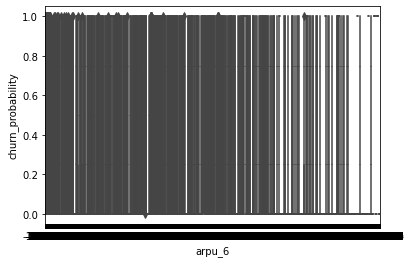

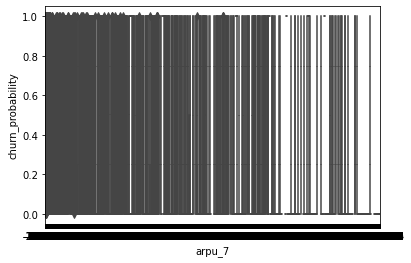

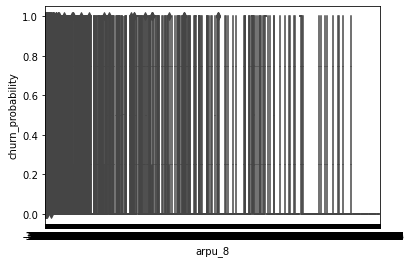

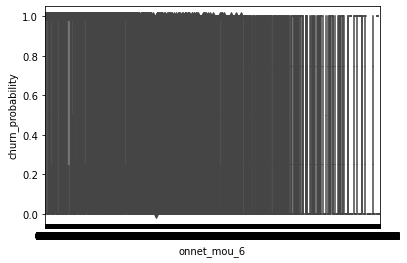

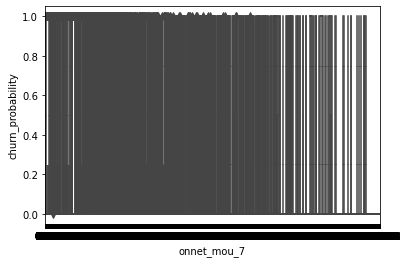

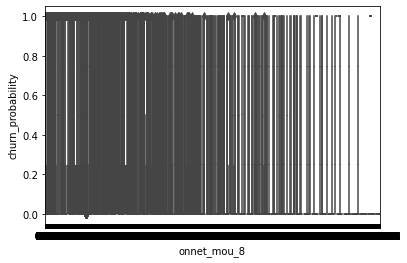

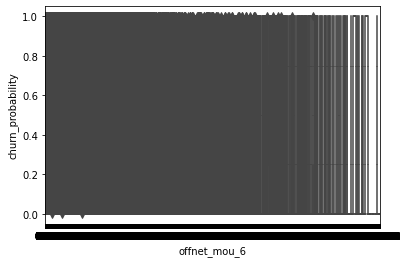

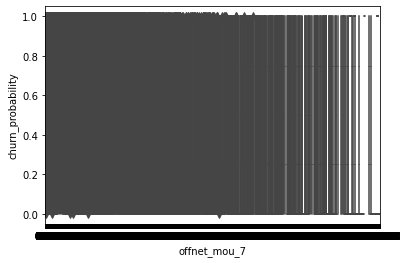

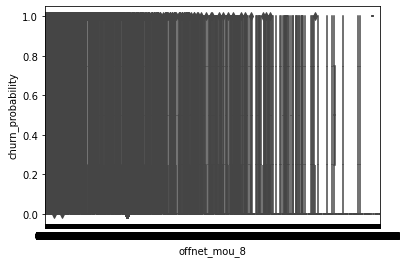

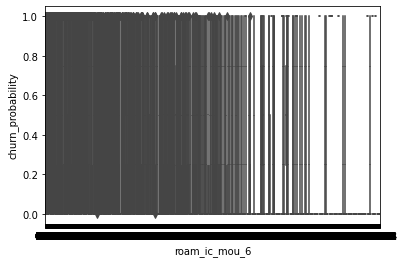

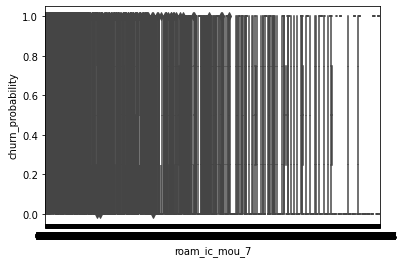

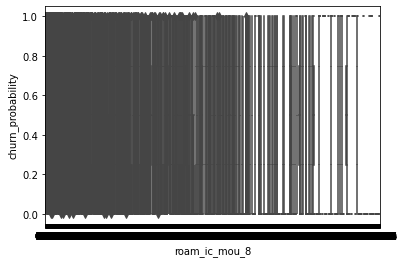

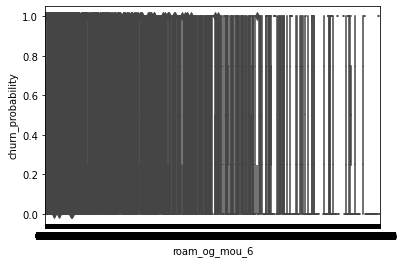

KeyboardInterrupt: 

In [178]:
# Showing box plot of all the columns with respect to "churn_probability"
for col in df_telecom_churn.columns:
    plt.figure()
    sns.boxplot(x=col, y='churn_probability', data=df_telecom_churn)
    plt.show()

In [183]:
mou_og_cols6 = df_telecom_churn.columns[df_telecom_churn.columns.str.contains('.*_og_.*mou_6',regex=True)]

In [185]:
mou_ic_cols6 = df_telecom_churn.columns[df_telecom_churn.columns.str.contains('.*_ic_.*mou_6',regex=True)]

In [179]:
df_telecom_churn.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'churn_probability'],
      dtype='object', length=125)

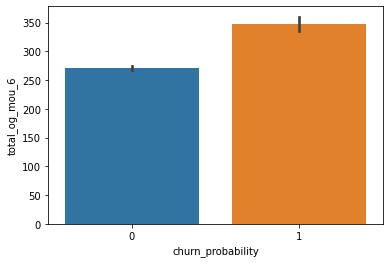

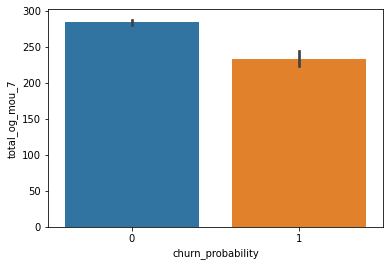

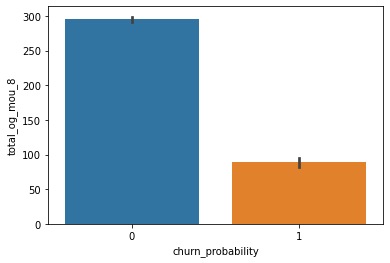

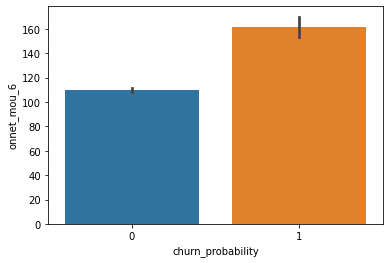

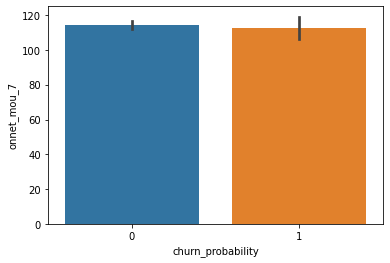

<Figure size 432x288 with 0 Axes>

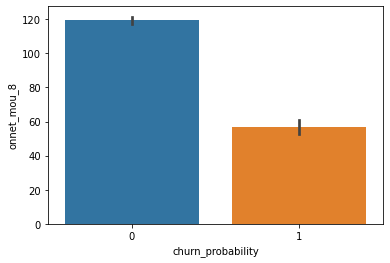

<Figure size 432x288 with 0 Axes>

In [42]:
# bar plot of important features with churn_probability.
plt.figure()
sns.barplot(x='churn_probability', y='total_og_mou_6', data=df_telecom_churn)
plt.figure()
sns.barplot(x='churn_probability', y='total_og_mou_7', data=df_telecom_churn)
plt.show()
plt.figure()
sns.barplot(x='churn_probability', y='total_og_mou_8', data=df_telecom_churn)
plt.figure()
sns.barplot(x='churn_probability', y='onnet_mou_6', data=df_telecom_churn)
plt.show()
plt.figure()
sns.barplot(x='churn_probability', y='onnet_mou_7', data=df_telecom_churn)
plt.show()
plt.figure()
sns.barplot(x='churn_probability', y='onnet_mou_8', data=df_telecom_churn)
plt.figure()

### Notes

#### Due to outgoing voice calls, the exit is maximum in month_6, then month_7 and month_8 drops rapidly
#### The probability of leaving is less in outgoing month_7 as well as in month_8
#### Dropout probability is higher in month_6 internet voice call and lower in month_8
#### The probability of churn or non_churn is the same for internet voice call month_7

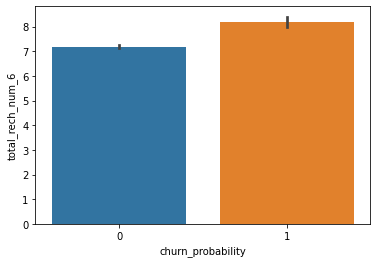

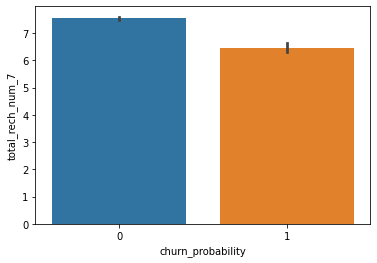

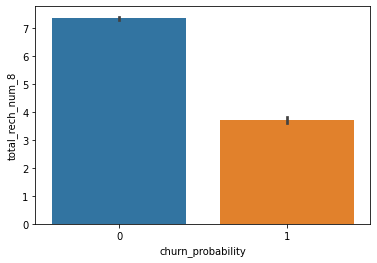

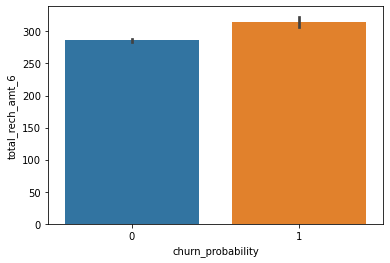

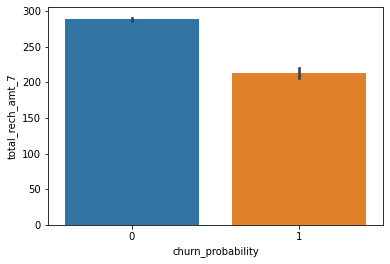

<Figure size 432x288 with 0 Axes>

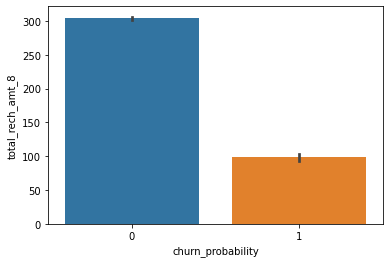

<Figure size 432x288 with 0 Axes>

In [43]:
plt.figure()
sns.barplot(x='churn_probability', y='total_rech_num_6', data=df_telecom_churn)
plt.figure()
sns.barplot(x='churn_probability', y='total_rech_num_7', data=df_telecom_churn)
plt.show()
plt.figure()
sns.barplot(x='churn_probability', y='total_rech_num_8', data=df_telecom_churn)
plt.figure()
sns.barplot(x='churn_probability', y='total_rech_amt_6', data=df_telecom_churn)
plt.show()
plt.figure()
sns.barplot(x='churn_probability', y='total_rech_amt_7', data=df_telecom_churn)
plt.show()
plt.figure()
sns.barplot(x='churn_probability', y='total_rech_amt_8', data=df_telecom_churn)
plt.figure()

### Notes

#### Probability of being churn is less for the customers who recharge or recharge more amount in month_8

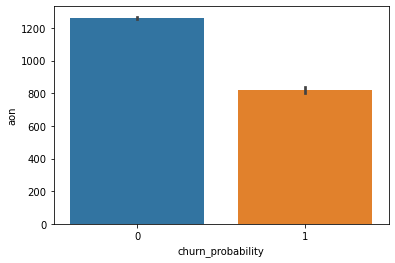

In [44]:
plt.figure()
sns.barplot(x='churn_probability', y='aon', data=df_telecom_churn)
plt.show()

### Note
#### If operator is using same network(T) from many days then its probabilty to churn is less.

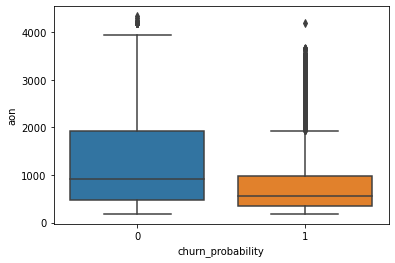

In [45]:
plt.figure()
sns.boxplot(x='churn_probability', y='aon', data=df_telecom_churn)
plt.show()

### Note
#### The average amount of churn is equal to 25% of the cases where an non-churn occurs

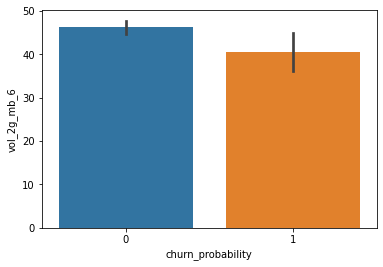

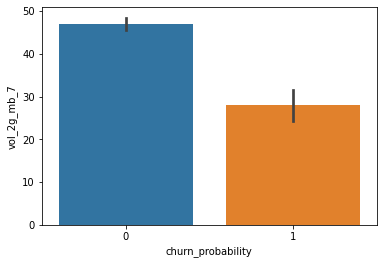

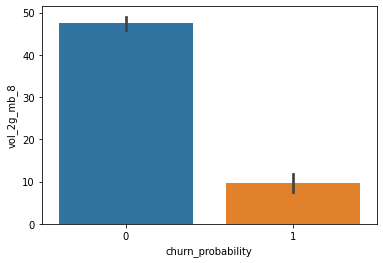

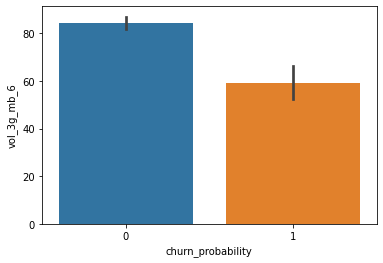

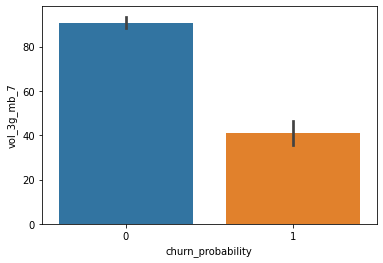

<Figure size 432x288 with 0 Axes>

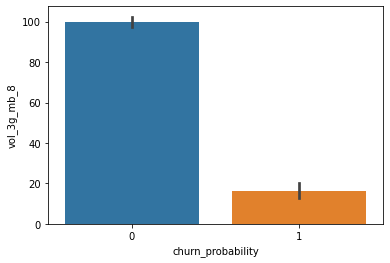

<Figure size 432x288 with 0 Axes>

In [46]:
plt.figure()
sns.barplot(x='churn_probability', y='vol_2g_mb_6', data=df_telecom_churn)
plt.figure()
sns.barplot(x='churn_probability', y='vol_2g_mb_7', data=df_telecom_churn)
plt.show()
plt.figure()
sns.barplot(x='churn_probability', y='vol_2g_mb_8', data=df_telecom_churn)
plt.figure()
sns.barplot(x='churn_probability', y='vol_3g_mb_6', data=df_telecom_churn)
plt.show()
plt.figure()
sns.barplot(x='churn_probability', y='vol_3g_mb_7', data=df_telecom_churn)
plt.show()
plt.figure()
sns.barplot(x='churn_probability', y='vol_3g_mb_8', data=df_telecom_churn)
plt.figure()

### Note
#### A customer with more 2g and 3g data usage churn less with an 8 month customer

In [47]:
# Finding shape of train and test data
print(df_telecom_churn.shape)
print(df_telecom_churn_test.shape)

(61009, 125)
(30000, 124)


<h2>Correlation</h2>
Lets check how these variables are corelated with each other

In [180]:
df_telecom_churn.corr()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
arpu_6,1.000000,0.677623,0.529483,0.560800,0.386435,0.292604,0.694790,0.491885,0.381588,0.122000,...,0.135538,0.125691,0.085306,0.042580,0.029040,0.036445,0.121119,0.149245,0.177886,0.034494
arpu_7,0.677623,1.000000,0.711156,0.401944,0.558055,0.424338,0.504002,0.687441,0.521972,0.089267,...,0.214032,0.138679,0.046484,0.086663,0.040241,0.034478,0.149371,0.179745,0.129948,-0.072129
arpu_8,0.529483,0.711156,1.000000,0.298277,0.420609,0.557476,0.376725,0.513083,0.685989,0.087018,...,0.148420,0.229310,0.032455,0.050523,0.088908,0.046131,0.185261,0.144549,0.114909,-0.208325
onnet_mou_6,0.560800,0.401944,0.298277,1.000000,0.722583,0.568051,0.204725,0.146267,0.114859,0.029514,...,-0.015525,-0.021041,-0.021355,-0.020518,-0.023270,-0.042599,-0.035635,-0.035654,-0.032395,0.064659
onnet_mou_7,0.386435,0.558055,0.420609,0.722583,1.000000,0.767861,0.140404,0.204889,0.160059,0.049021,...,-0.007718,-0.021833,-0.027222,-0.020405,-0.022107,-0.046597,-0.037006,-0.037163,-0.041225,-0.001902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
aon,0.036445,0.034478,0.046131,-0.042599,-0.046597,-0.045411,0.006593,-0.001706,0.001020,0.017813,...,0.022404,0.028602,-0.026564,-0.028761,-0.026362,1.000000,0.014845,0.011226,0.007708,-0.137010
aug_vbc_3g,0.121119,0.149371,0.185261,-0.035635,-0.037006,-0.034361,-0.014362,-0.012729,-0.007001,0.003472,...,0.311371,0.372510,0.108820,0.111346,0.134354,0.014845,1.000000,0.696256,0.575476,-0.069436
jul_vbc_3g,0.149245,0.179745,0.144549,-0.035654,-0.037163,-0.036708,-0.004387,-0.007218,-0.009310,0.009823,...,0.365579,0.306143,0.131651,0.130856,0.115975,0.011226,0.696256,1.000000,0.685981,-0.043850
jun_vbc_3g,0.177886,0.129948,0.114909,-0.032395,-0.041225,-0.038785,0.000618,-0.013869,-0.014693,0.011892,...,0.301686,0.279875,0.149327,0.100784,0.089244,0.007708,0.575476,0.685981,1.000000,-0.023098


<h2>Let’s visualize some of these numbers using a heatmap.</h2>

In [88]:
def heatmap(x,y,dataframe):
    plt.figure(figsize=(x,y))
    sns.heatmap(dataframe.corr())
    plt.show()

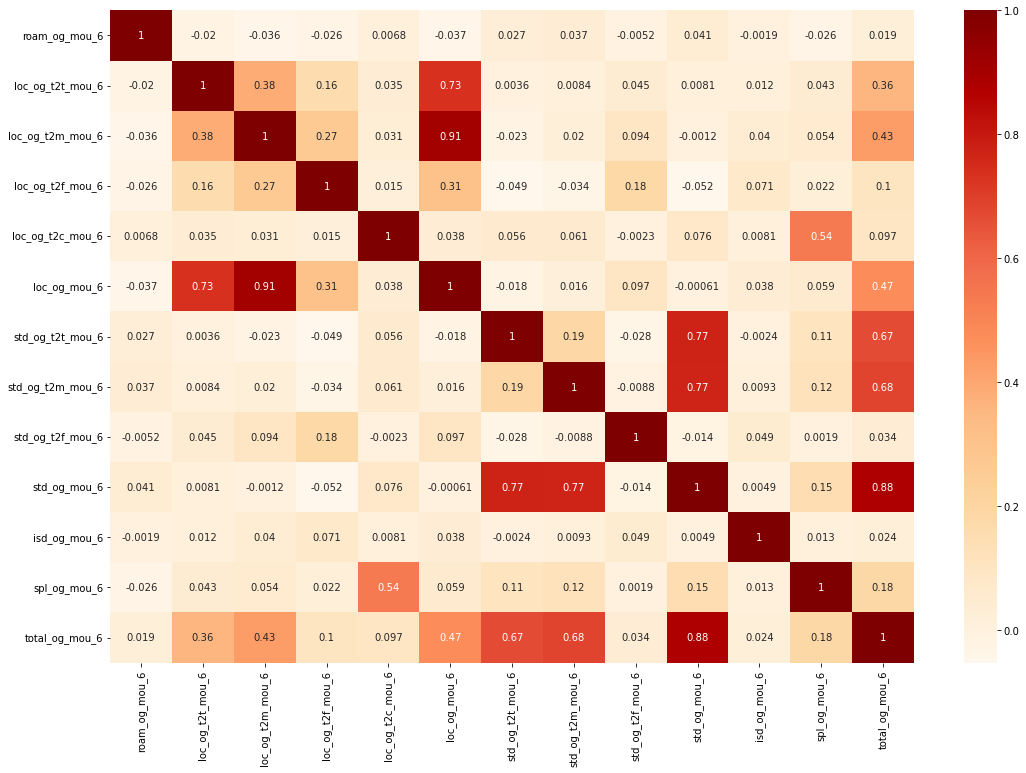

In [184]:
heatmap(18,12,df_telecom_churn.filter(mou_og_cols6))

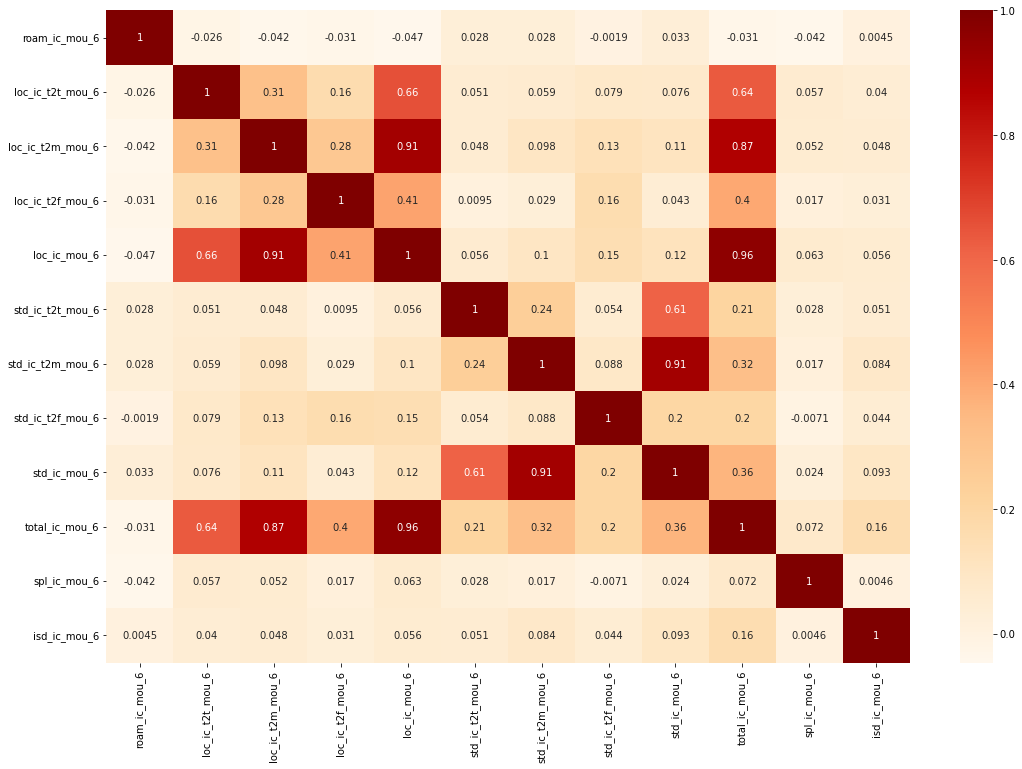

In [186]:
heatmap(18,12,df_telecom_churn.filter(mou_ic_cols6))

## Data Preprocessing

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [49]:
# Dividing into X_telecom_churn and y_telecom_churn sets for the model building
X_telecom_churn = df_telecom_churn.drop('churn_probability', axis = 1)
y_telecom_churn = df_telecom_churn['churn_probability']

In [50]:
# Checking shape of X_telecom_churn and y_telecom_churn set
print(X_telecom_churn.shape)
y_telecom_churn.shape

(61009, 124)


(61009,)

## Train-test split

In [53]:
# split train data and test results into train data containing 75% data and test data containing 25% data
X_train_telecom_churn, X_test_telecom_churn, y_train_telecom_churn, y_test_telecom_churn = train_test_split(X_telecom_churn, y_telecom_churn, test_size = 0.25, random_state = 100)

In [54]:
# Checking shape of X test set
X_test_telecom_churn.shape

(15253, 124)

In [55]:
# Checking shape of X train set
X_train_telecom_churn.shape

(45756, 124)

In [56]:
# Checking shape of y test set
y_train_telecom_churn.shape

(45756,)

# Scaling features

In [57]:
# Rescaling the Features. We will use MinMax scaling.
from sklearn.preprocessing import MinMaxScaler
scaler_telecom_churn = MinMaxScaler()

In [58]:
# scaling train and test set
X_train_sc_telecom_churn = scaler_telecom_churn.fit_transform(X_train_telecom_churn)
X_test_sc_telecom_churn = scaler_telecom_churn.transform(X_test_telecom_churn)

In [59]:
# Checking shape of X_train_sc_telecom_churn set after fit transformation
X_train_sc_telecom_churn.shape

(45756, 124)

In [60]:
# Checking shape of X_test_sc_telecom_churn set after transformation
X_test_sc_telecom_churn.shape

(15253, 124)

In [61]:
# Checking data of X_train_sc_telecom_churn set after fit transformation
X_train_sc_telecom_churn

array([[0.17813337, 0.16963604, 0.11917454, ..., 0.        , 0.        ,
        0.        ],
       [0.15593038, 0.19144518, 0.36884359, ..., 0.13177026, 0.        ,
        0.        ],
       [0.44734001, 0.45999003, 0.34272929, ..., 0.18584291, 0.28387267,
        0.71477154],
       ...,
       [0.21449671, 0.17912366, 0.26563808, ..., 0.1378388 , 0.17183473,
        0.05627861],
       [0.19402816, 0.28093929, 0.29373759, ..., 0.        , 0.        ,
        0.        ],
       [0.10992966, 0.1497007 , 0.18264473, ..., 0.        , 0.        ,
        0.        ]])

In [62]:
# Checking data of X_test_sc_telecom_churn set after  transformation
X_test_sc_telecom_churn

array([[0.08928222, 0.13540188, 0.15284273, ..., 0.        , 0.        ,
        0.        ],
       [0.1773507 , 0.1045776 , 0.11913657, ..., 0.        , 0.        ,
        0.        ],
       [0.22110427, 0.16438799, 0.22336662, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.07014498, 0.12902807, 0.15938623, ..., 0.        , 0.        ,
        0.        ],
       [0.09952013, 0.13560385, 0.20916774, ..., 0.        , 0.        ,
        0.        ],
       [0.12751752, 0.11770294, 0.12809437, ..., 0.        , 0.        ,
        0.10136201]])

## PCA (Principal Component Analysis)

In [63]:
# Importing PCA module and fitting PCA on scaled training data set
from sklearn.decomposition import PCA
pca_telecom_churn = PCA(random_state=42)
pca_telecom_churn.fit(X_train_sc_telecom_churn)

PCA(random_state=42)

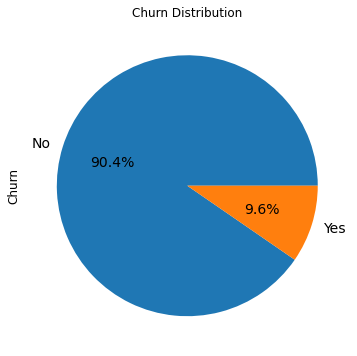

In [68]:
#Churn Distribution
pie_chart = y_train_telecom_churn.value_counts()*100.0 /len(X_train_telecom_churn)
ax = pie_chart.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(8,6), fontsize = 14 )                                                                           
ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('Churn Distribution', fontsize = 12)
plt.show()

In [69]:
# Checking the value of the pca components after fitting the pca on the train data set
pca_telecom_churn.components_

array([[ 1.74556694e-01,  1.75921218e-01,  1.74638302e-01, ...,
         2.98323119e-02,  3.07935125e-02,  2.81036636e-02],
       [ 6.01177953e-02,  7.30367569e-02,  6.80960361e-02, ...,
        -4.59670119e-02, -4.58864950e-02, -4.44215761e-02],
       [ 4.87657283e-02,  5.38145636e-02,  5.76308442e-02, ...,
         1.79001395e-01,  1.83389454e-01,  1.71549553e-01],
       ...,
       [ 2.21389966e-07, -6.94670593e-07,  6.50463755e-07, ...,
        -3.67810850e-08,  6.22942531e-08,  5.23934605e-08],
       [-0.00000000e+00, -2.60273846e-17, -1.72523880e-16, ...,
         1.52980458e-16, -3.32260770e-17, -2.44979808e-17],
       [-0.00000000e+00, -3.08934728e-17,  2.76688982e-17, ...,
        -5.32000321e-17,  3.66358594e-17, -1.02088674e-17]])

In [70]:
# PCA component variance check after fitting PCA on train data set
pca_telecom_churn.explained_variance_ratio_

array([1.55079567e-01, 1.00977973e-01, 6.62190362e-02, 5.41397531e-02,
       4.36256538e-02, 3.49500439e-02, 3.28198749e-02, 2.99362472e-02,
       2.87148959e-02, 2.61991854e-02, 2.10361782e-02, 1.63608719e-02,
       1.50930532e-02, 1.50278100e-02, 1.37688471e-02, 1.34752236e-02,
       1.30896420e-02, 1.27008563e-02, 1.23373177e-02, 1.17645998e-02,
       1.13140080e-02, 1.00600550e-02, 9.63114180e-03, 9.28164465e-03,
       9.03308800e-03, 8.87372719e-03, 7.87944200e-03, 7.81924582e-03,
       7.41994336e-03, 7.10032646e-03, 7.05981329e-03, 6.85787331e-03,
       6.77723539e-03, 6.07352852e-03, 6.04319000e-03, 5.97162410e-03,
       5.89545860e-03, 5.83333142e-03, 5.80850494e-03, 5.75293553e-03,
       5.59249562e-03, 5.39348555e-03, 5.21494568e-03, 4.76814585e-03,
       4.34291464e-03, 4.18361976e-03, 4.03417234e-03, 3.83894622e-03,
       3.66233346e-03, 3.63234797e-03, 3.56000748e-03, 3.31384971e-03,
       3.25191595e-03, 3.10061235e-03, 3.03984260e-03, 2.99209950e-03,
      

In [71]:
import matplotlib.pyplot as plt

<BarContainer object of 124 artists>

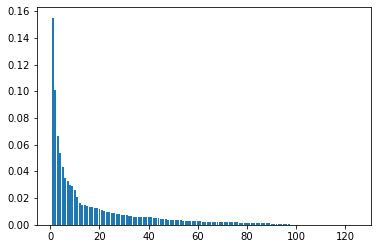

In [72]:
# PCA number visualization with variance
plt.bar(range(1,len(pca_telecom_churn.explained_variance_ratio_)+1), pca_telecom_churn.explained_variance_ratio_)

#### Note : The PCA_1 component has 15% information (maximum), the PCA_2 component has 10% information, and as we go further, the information-containing component decreases.

In [73]:
var_cumu_telecom_churn = np.cumsum(pca_telecom_churn.explained_variance_ratio_)

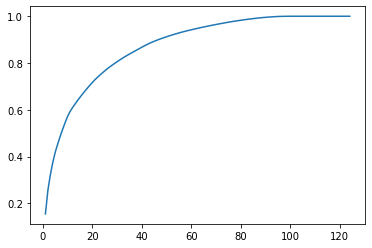

In [74]:
# Scree plot to find the no. of PC's needed to obtain the desired variance value
plt.plot(range(1,len(var_cumu_telecom_churn)+1), var_cumu_telecom_churn)

In [75]:
# Calculation of principal components for 95% variance coverage
pca_avg_telecom_churn = PCA(0.95)

In [76]:
#Application of PCA components to the train set
df_train_pca_telecom_churn = pca_avg_telecom_churn.fit_transform(X_train_sc_telecom_churn)
df_train_pca_telecom_churn.shape

(45756, 64)

In [77]:
# Application of PCA components to the test set

df_test_pca_telecom_churn = pca_avg_telecom_churn.transform(X_test_sc_telecom_churn)
df_test_pca_telecom_churn.shape

(15253, 64)

#### Note : After dimensional reduction, the variables are reduced to 64 on both the train and the test set

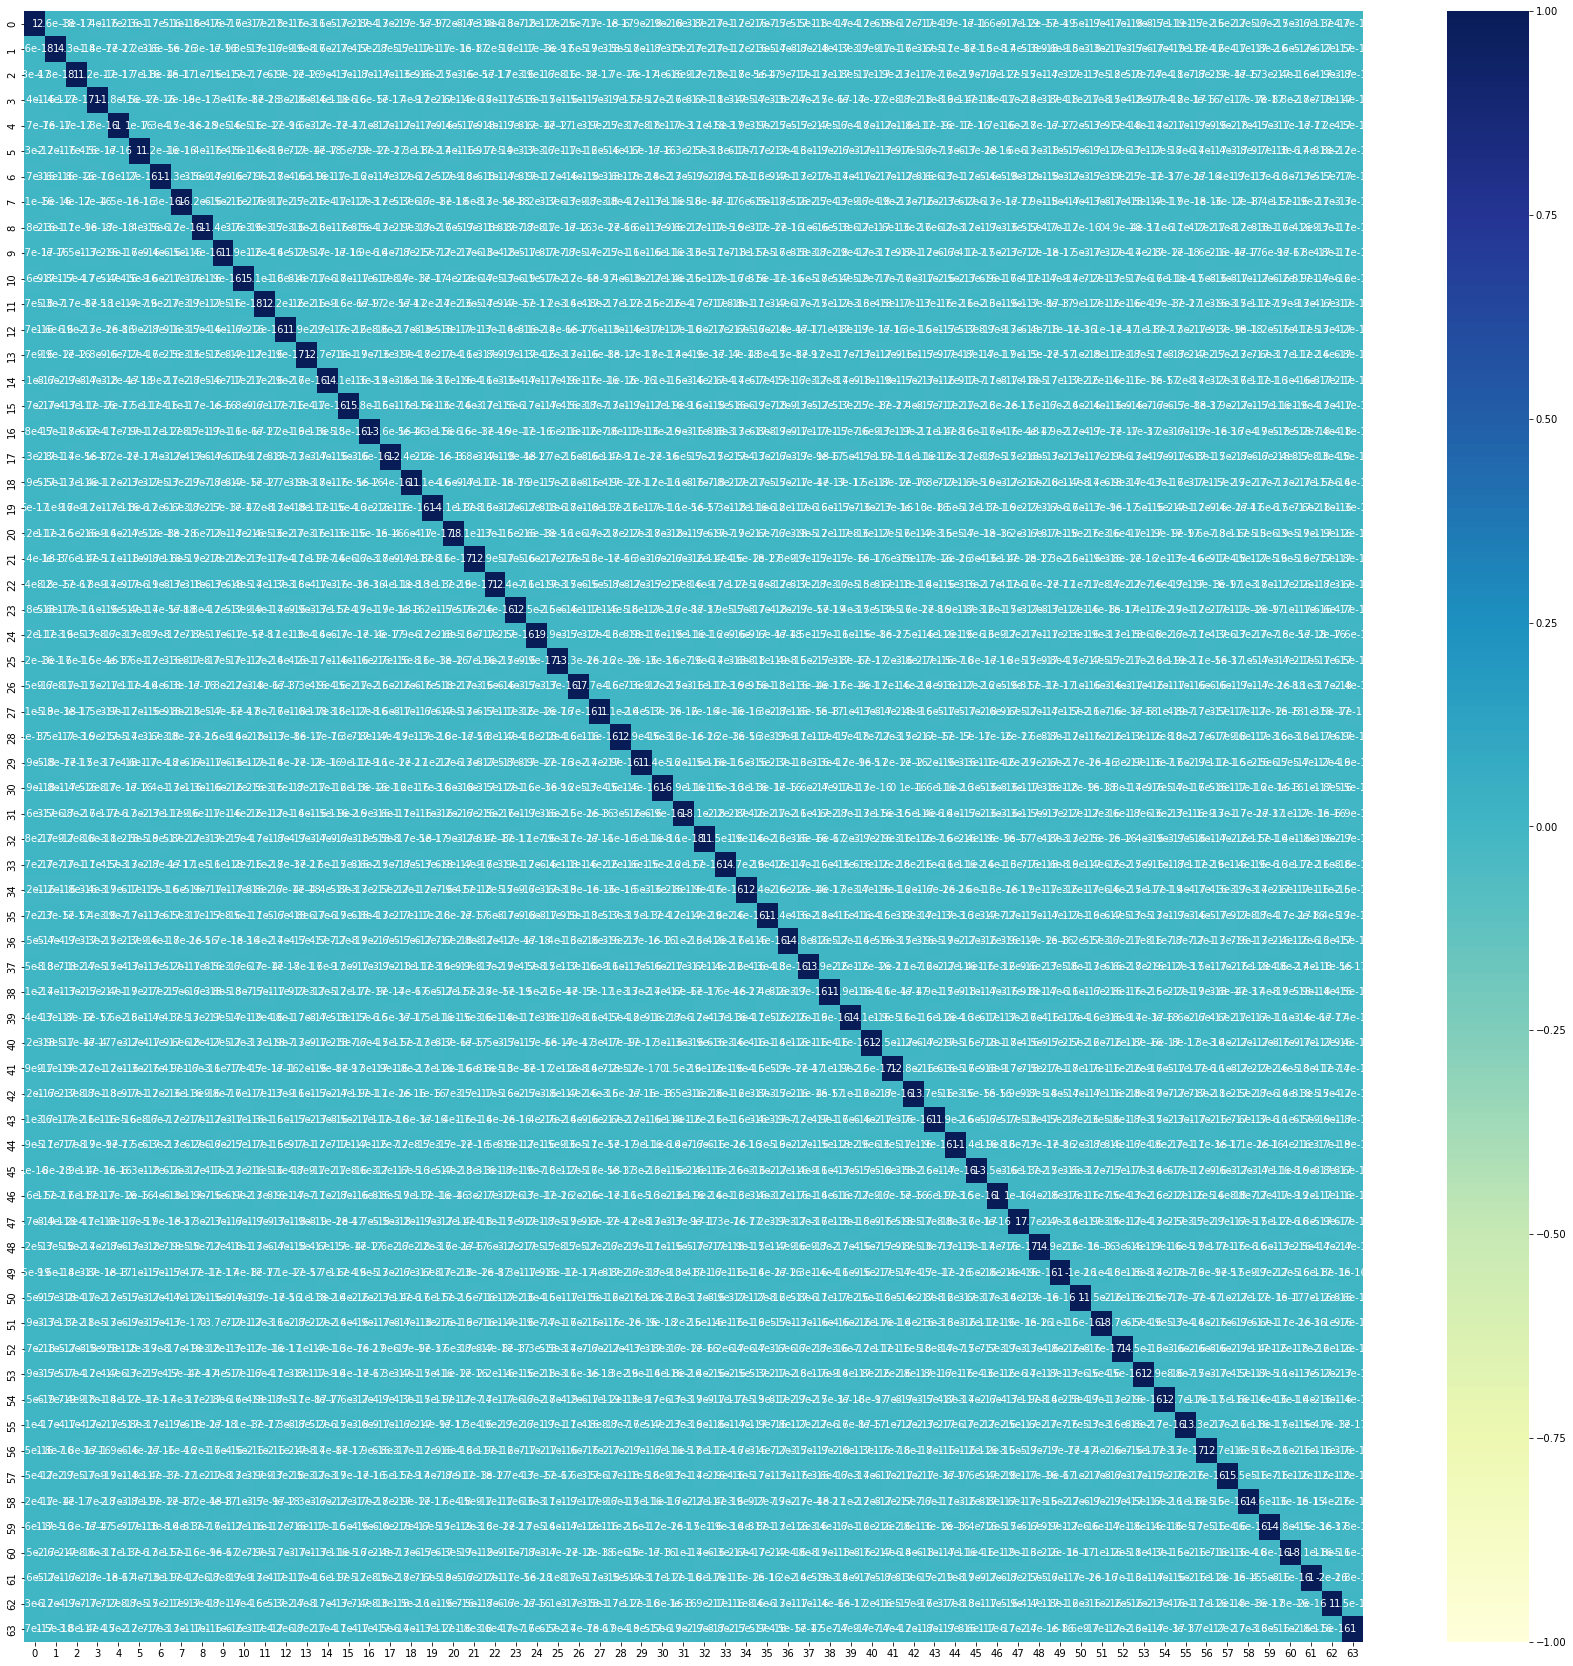

In [85]:
# checking the correlation between features after performing PCA on the train set
corr_telecom_churn = np.corrcoef(df_train_pca_telecom_churn.transpose())
plt.figure(figsize = (30, 30))
sns.heatmap(corr_telecom_churn,vmin=-1.0,vmax=1.0,annot=True, cmap="YlGnBu")
plt.show()

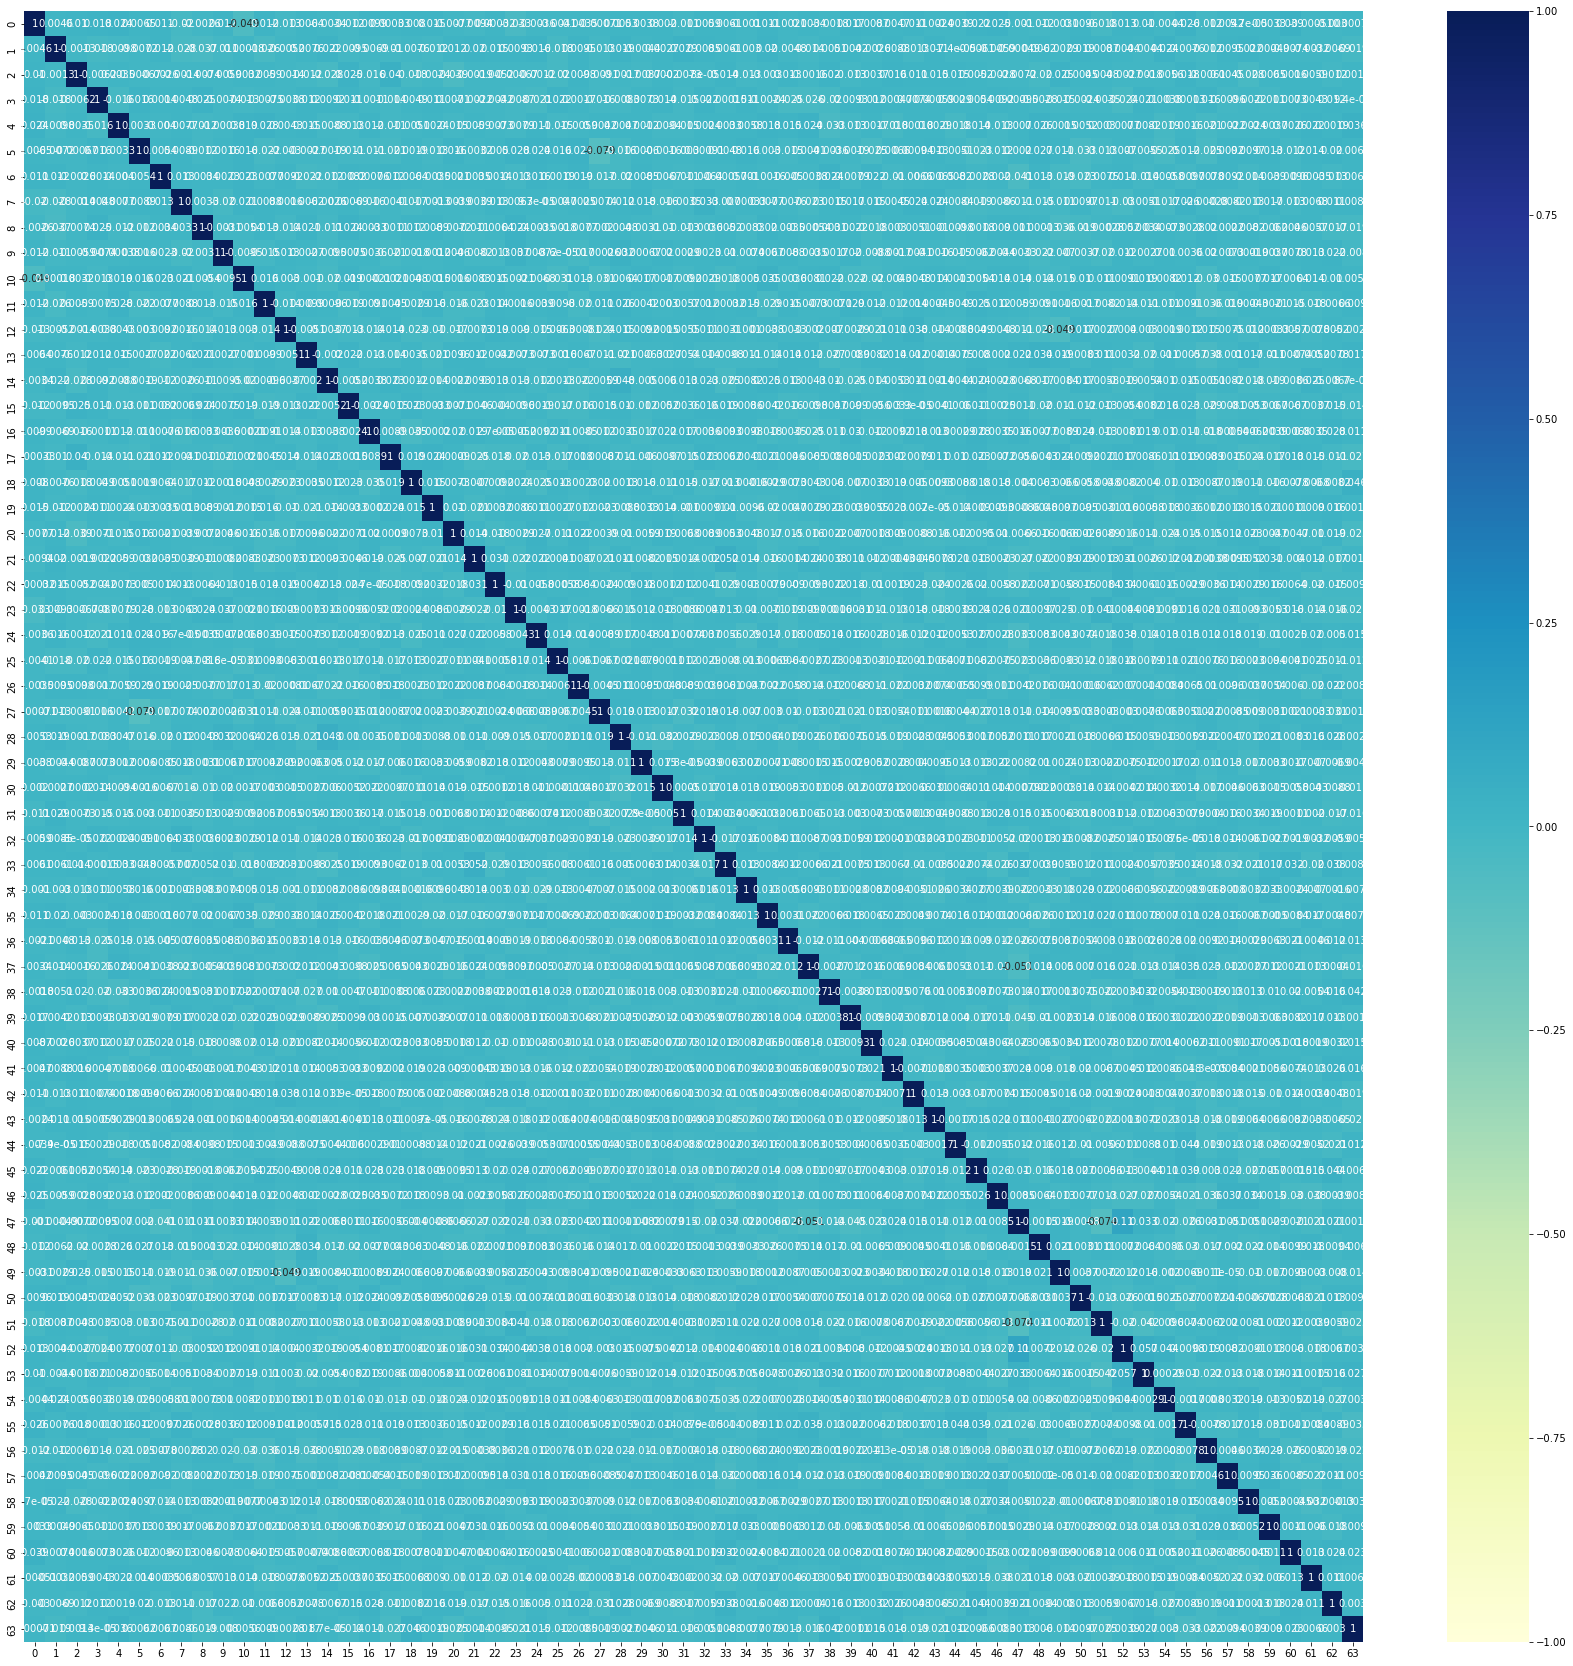

In [90]:
# checking the correlation between features after performing PCA on the test set
corr_telecom_churn = np.corrcoef(df_test_pca_telecom_churn.transpose())
plt.figure(figsize = (30, 30))
sns.heatmap(corr_telecom_churn,vmin=-1.0,vmax=1.0,annot=True, cmap="YlGnBu")
plt.show()

#### Note : Correlation processed by PCA (no correlation between features) on both train and test set

In [91]:
#Finding shape of PCAs of train set 
df_train_pca_telecom_churn.shape

(45756, 64)

In [92]:
#Finding shape of PCAs of test set 
df_test_pca_telecom_churn.shape

(15253, 64)

## Logistic regression with PCA

In [93]:
# Importing necessary module
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, StratifiedKFold, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.feature_selection import RFE

In [94]:
# Assigning number of splits for the kfold
fold_telecom_churn = StratifiedKFold(n_splits = 5)

In [95]:
# Creating a logistic regression model 
grid_lr_telecom_churn = [
    {    "penalty":['l1','l2'],
        "class_weight":[{0:1,1:1}, {0:1,1:2}, {0:1,1:3}]
    }    
]

gscv_telecom_churn = GridSearchCV(LogisticRegression(solver='lbfgs'), grid_lr_telecom_churn, cv = fold_telecom_churn , scoring = 'accuracy', verbose = 1, n_jobs = -1)

In [96]:
# Fitting of the model on trained PC data set
gfit_lr_telecom_churn = gscv_telecom_churn.fit(df_train_pca_telecom_churn, y_train_telecom_churn)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [97]:
# Checking the score and the parameter of the model
print("score : {}".format(gfit_lr_telecom_churn.best_score_))
logistic_params_telecom_churn = gfit_lr_telecom_churn.best_params_
print(logistic_params_telecom_churn)

score : 0.9165574327732152
{'class_weight': {0: 1, 1: 2}, 'penalty': 'l2'}


#### Note : Accuracy of the logistic regression is 91.65% on train set

In [98]:
# Finding the best model
lr_best_telecom_churn = gfit_lr_telecom_churn.best_estimator_

In [99]:
# Finding the prediction on the train data set
X_train_pred_telecom_churn = lr_best_telecom_churn.predict(df_train_pca_telecom_churn)

In [100]:
# Printing the coefficient of the best fit model
print(lr_best_telecom_churn.coef_.shape)
lr_best_telecom_churn.coef_

(1, 64)


array([[-4.07005538,  3.16122262, -0.72855167, -0.4509661 ,  0.6093428 ,
        -2.40830193,  2.93232864, -6.57220159,  1.16172185, -0.9174746 ,
        -0.38077687, -3.35132175,  2.29981582,  3.57136788, -1.28502535,
         1.86973281,  1.29506085,  1.36995529, -0.35906479,  2.51486208,
         1.35700596, -0.96696564, -1.88630733, -1.15856738, -0.08501985,
         5.84002455,  2.16709532, -0.07008911,  4.81506749,  1.68662184,
        -1.82749633, -5.43159507, -7.14070785,  0.27878365, -2.17672489,
         0.51251483,  1.54231178, -1.81309799,  0.69825592, -0.32693668,
         3.23425739, -0.50740864,  1.73889495, -2.91808945, -4.18053766,
        -0.79266127,  1.60585925,  1.61995293,  0.47764795, -1.20291928,
        -0.59809562, -1.70370809, -1.37715665,  2.69230974, -3.32937956,
        -0.90871374, -2.11851379,  0.09091675,  1.19078295,  0.69465385,
         3.30501748,  1.93749401,  0.77184348, -1.59598699]])

In [101]:
# Predicting on the PCs test data set
y_pred_lr_telecom_churn = lr_best_telecom_churn.predict(df_test_pca_telecom_churn)

In [102]:
# Printing the confusion matrix
print(confusion_matrix(y_test_telecom_churn, y_pred_lr_telecom_churn))

[[13213   578]
 [  688   774]]


In [103]:
#Printing the model report on the train and test data set after PCA
print(classification_report(y_test_telecom_churn, y_pred_lr_telecom_churn))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     13791
           1       0.57      0.53      0.55      1462

    accuracy                           0.92     15253
   macro avg       0.76      0.74      0.75     15253
weighted avg       0.91      0.92      0.92     15253



#### Note : Accuracy of the logistic regression is 92.00% on test set

## Finding ROC(Receiver operating characteristic) of Logistic with PCA model

In [104]:
def draw_roc_telecom_churn( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [105]:
from sklearn import metrics

In [106]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_telecom_churn, X_train_pred_telecom_churn, drop_intermediate = False )

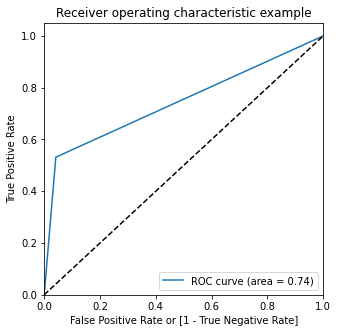

In [107]:
draw_roc_telecom_churn(y_train_telecom_churn, X_train_pred_telecom_churn)

#### Note : ROC is 0.74

## Random forest with PCA

In [108]:
# Creating a Random Forest model
grid_rd_telecom_churn = [
    {   'n_estimators' : [250],
        'max_depth' : [ 7], 
        'max_features' : [ 15],
        'min_samples_split':[3, 4],
        'min_samples_leaf':[1,2],
        "class_weight":['balanced', {0:1,1:10}]
    }    
]

gscv2_telecom_churn = HalvingGridSearchCV(RandomForestClassifier(random_state = 100), grid_rd_telecom_churn, cv = fold_telecom_churn , scoring = 'accuracy', verbose = 1, n_jobs = -1)

In [109]:
# Fitting the model on trained PCs data set
gfit_rd_telecom_churn = gscv2_telecom_churn.fit(df_train_pca_telecom_churn, y_train_telecom_churn)

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 15252
max_resources_: 45756
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 8
n_resources: 15252
Fitting 5 folds for each of 8 candidates, totalling 40 fits
----------
iter: 1
n_candidates: 3
n_resources: 45756
Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [111]:
# Checking score and parameter of the model
print("score : {}".format(gfit_rd_telecom_churn.best_score_))
gfit_rd_telecom_churn.best_params_

score : 0.8480854365146382


{'class_weight': 'balanced',
 'max_depth': 7,
 'max_features': 15,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 250}

#### Note : Accuracy of the random forest is 84.88% on train set

In [112]:
# Finding the best model

rf_best_telecom_churn = gfit_rd_telecom_churn.best_estimator_

In [113]:
# Finding prediction on the train data set

X_train_pred_rd_telecom_churn = rf_best_telecom_churn.predict(df_train_pca_telecom_churn)

In [114]:
# Printing some of the important features

rf_best_telecom_churn.feature_importances_

array([0.11236755, 0.11154716, 0.03290881, 0.00496629, 0.01642252,
       0.0152635 , 0.08061289, 0.26915205, 0.0172785 , 0.00639503,
       0.00590359, 0.00435123, 0.00779848, 0.02493462, 0.00316028,
       0.004593  , 0.00958327, 0.01141343, 0.00339444, 0.0267309 ,
       0.01292129, 0.01614938, 0.00416174, 0.00611505, 0.00631175,
       0.02346764, 0.00736133, 0.00239435, 0.02202335, 0.00512808,
       0.00781074, 0.00828076, 0.01753868, 0.00199644, 0.00382579,
       0.00141629, 0.00428029, 0.00204824, 0.00179449, 0.00184654,
       0.0051489 , 0.00251243, 0.00941538, 0.0052932 , 0.00396469,
       0.00610015, 0.00161051, 0.00192472, 0.00178288, 0.00201908,
       0.00216515, 0.00227749, 0.00209021, 0.00383075, 0.00214819,
       0.00236102, 0.00212771, 0.00259279, 0.00220581, 0.00193215,
       0.00239721, 0.00372697, 0.00158222, 0.00314061])

In [115]:
# Predicting on PCs test data set

y_pred_rd_telecom_churn = rf_best_telecom_churn.predict(df_test_pca_telecom_churn)

In [116]:
# Printing the confusion matrix

print(confusion_matrix(y_test_telecom_churn, y_pred_rd_telecom_churn))

[[11843  1948]
 [  370  1092]]


In [117]:
#Printing the model report on the train and test data set after PCA

print(classification_report(y_test_telecom_churn, y_pred_rd_telecom_churn))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91     13791
           1       0.36      0.75      0.49      1462

    accuracy                           0.85     15253
   macro avg       0.66      0.80      0.70     15253
weighted avg       0.91      0.85      0.87     15253



### Note : Accuracy of the random forest is 85% on test set

## Finding ROC(Receiver operating characteristic) of Random Forest  with PCA model

In [118]:
def draw_roc_telecom_churn( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [119]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_telecom_churn, X_train_pred_rd_telecom_churn, drop_intermediate = False )

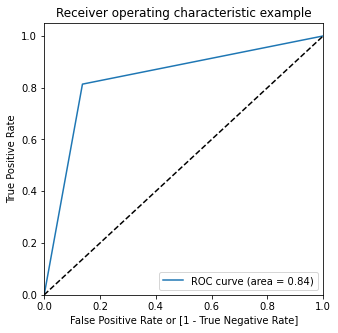

In [120]:
draw_roc_telecom_churn(y_train_telecom_churn, X_train_pred_rd_telecom_churn)

#### Note : ROC is 0.84

## XG-boost with PCA

In [121]:
# Creating a XGBoost model 
grid_xgb_telecom_churn = [
    { 
        'n_estimators': [1200],
        'learning_rate': [0.01],
        'max_depth': [4,5],
        'min_child_weight': [2],
        "class_weight":[{0:1,1:10}, 'balanced' ]
    }    
]

gscv3_telecom_churn = RandomizedSearchCV(XGBClassifier(random_state = 100, tree_method='gpu_hist', predictor='gpu_predictor'), grid_xgb_telecom_churn, cv = fold_telecom_churn , scoring = 'accuracy', n_jobs = -1, n_iter=20)

In [122]:
# Fitting the model on trained PCs data set
gfit_xgb_telecom_churn = gscv3_telecom_churn.fit(df_train_pca_telecom_churn, y_train_telecom_churn)

[02:48:21] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [123]:
# Checking score and parameter of the model
print("score : {}".format(gfit_xgb_telecom_churn.best_score_))
xgbparams_telecom_churn = gfit_xgb_telecom_churn.best_params_
print(xgbparams_telecom_churn)

score : 0.9210376383260496
{'n_estimators': 1200, 'min_child_weight': 2, 'max_depth': 5, 'learning_rate': 0.01, 'class_weight': {0: 1, 1: 10}}


#### Note : Accuracy of the xg-boost is 92.09% on train set

In [124]:
xgb_best_telecom_churn = gfit_xgb_telecom_churn.best_estimator_

In [125]:
def draw_roc_telecom_churn( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [126]:
# Finding the best model
rf_best_telecom_churn = gfit_xgb_telecom_churn.best_estimator_

In [127]:
# Finding prediction on the train data set
X_train_pred_xgb_telecom_churn = rf_best_telecom_churn.predict(df_train_pca_telecom_churn)

In [128]:
# Printing coefficient of the best fit model feature
xgb_best_telecom_churn.feature_importances_

array([0.0615741 , 0.02494167, 0.01261728, 0.01154141, 0.01107573,
       0.02231561, 0.03186895, 0.09633144, 0.01589046, 0.01165327,
       0.01351367, 0.0192772 , 0.01234031, 0.02070801, 0.01130926,
       0.01515041, 0.01950827, 0.01807798, 0.00783344, 0.02687631,
       0.01583129, 0.01632864, 0.00962745, 0.01599334, 0.02062551,
       0.01761337, 0.01581837, 0.00814415, 0.02550426, 0.01290158,
       0.0138364 , 0.01314172, 0.02044852, 0.01037369, 0.01126382,
       0.00710257, 0.01439089, 0.01105956, 0.00959852, 0.00917931,
       0.01063936, 0.01052379, 0.01219215, 0.01162278, 0.01438629,
       0.01475555, 0.00980378, 0.01009989, 0.00621405, 0.00844313,
       0.00857231, 0.00885797, 0.01070387, 0.0173851 , 0.0103358 ,
       0.00836318, 0.00966984, 0.01099732, 0.01004874, 0.00858963,
       0.01348839, 0.01079402, 0.00733335, 0.01299195], dtype=float32)

In [129]:
# Predicting on the PCs test data set
y_pred_xgb_telecom_churn = xgb_best_telecom_churn.predict(df_test_pca_telecom_churn)

In [130]:
# Printing the confusion matrix
print(confusion_matrix(y_test_telecom_churn, y_pred_xgb_telecom_churn))

[[13505   286]
 [  935   527]]


In [131]:
#Printing the model report on the train and test data set after PCA
print(classification_report(y_test_telecom_churn, y_pred_xgb_telecom_churn))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     13791
           1       0.65      0.36      0.46      1462

    accuracy                           0.92     15253
   macro avg       0.79      0.67      0.71     15253
weighted avg       0.91      0.92      0.91     15253



#### Note : Accuracy of the xg-boost is 92.00% on test set

## Finding ROC(Receiver operating characteristic) of XGBoost with PCA model

In [132]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_telecom_churn, X_train_pred_xgb_telecom_churn, drop_intermediate = False )

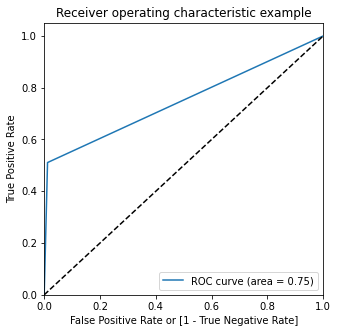

In [133]:
draw_roc_telecom_churn(y_train_telecom_churn, X_train_pred_xgb_telecom_churn)

#### Note : ROC is 0.75

## Logistic regression without PCA (using RFE)

In [134]:
# Importing the necessary module
from sklearn.linear_model import LogisticRegression
lr_telecom_churn = LogisticRegression()

In [135]:
# Performing RFE on 50 features
from sklearn.feature_selection import RFE
rfe_telecom_churn = RFE(lr_telecom_churn, n_features_to_select=50)            
rfe_telecom_churn = rfe_telecom_churn.fit(X_train_sc_telecom_churn, y_train_telecom_churn)

In [136]:
# Printing all the features with it's rank after RFE
list(zip(X_train_telecom_churn.columns, rfe_telecom_churn.support_, rfe_telecom_churn.ranking_))

[('arpu_6', True, 1),
 ('arpu_7', True, 1),
 ('arpu_8', True, 1),
 ('onnet_mou_6', True, 1),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', True, 1),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 12),
 ('roam_ic_mou_7', False, 55),
 ('roam_ic_mou_8', True, 1),
 ('roam_og_mou_6', False, 35),
 ('roam_og_mou_7', False, 25),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 73),
 ('loc_og_t2t_mou_7', False, 58),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', True, 1),
 ('loc_og_t2m_mou_7', False, 7),
 ('loc_og_t2m_mou_8', False, 24),
 ('loc_og_t2f_mou_6', False, 46),
 ('loc_og_t2f_mou_7', False, 56),
 ('loc_og_t2f_mou_8', True, 1),
 ('loc_og_t2c_mou_6', False, 36),
 ('loc_og_t2c_mou_7', False, 48),
 ('loc_og_t2c_mou_8', False, 22),
 ('loc_og_mou_6', False, 71),
 ('loc_og_mou_7', False, 33),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', False, 50),
 ('std_og_t2t_mou_7', False, 37),
 ('std_og_t2t_mou_8', True, 1)

In [137]:
# Listing top 50 columns after RFE
col = X_train_telecom_churn.columns[rfe_telecom_churn.support_]
col

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2f_mou_8', 'loc_og_mou_8',
       'std_og_t2t_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'isd_og_mou_8',
       'spl_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2f_mou_8',
       'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6',
       'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_7', 'spl_ic_mou_8',
       'isd_ic_mou_6', 'isd_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_8',
       'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_8',
       'monthly_2g_8', 'sachet_2g_8', 'sachet_3g_8', 'aon', 'aug_vbc_3g'],
      dtype='object')

In [138]:
# Creating a new X_train_rfe_telecom_churn with to 50 features after RFE
X_train_rfe_telecom_churn = X_train_telecom_churn[col]

In [139]:
# Checking shape of new X_train_rfe_telecom_churn set
X_train_rfe_telecom_churn.shape

(45756, 50)

In [140]:
# Logistic Regression with the Hyperparameter tuning 

In [141]:
grid_LR_telecom_churn = [
    {    "penalty":['l1','l2'],
        "class_weight":[{0:1,1:1}, {0:1,1:2}, {0:1,1:3}]
    }    
]

gscv_telecom_churn = GridSearchCV(LogisticRegression(solver='lbfgs'), grid_LR_telecom_churn, cv = fold_telecom_churn , scoring = 'accuracy', verbose = 1, n_jobs = -1)

In [142]:
# Fitting the model on train data set
gfit_LR_telecom_churn = gscv_telecom_churn.fit(X_train_rfe_telecom_churn, y_train_telecom_churn)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [143]:
# Checking score and parameter of the model
print("score : {}".format(gfit_LR_telecom_churn.best_score_))
logistic_params_telecom_churn = gfit_LR_telecom_churn.best_params_
print(logistic_params_telecom_churn)

score : 0.9329268343938872
{'class_weight': {0: 1, 1: 1}, 'penalty': 'l2'}


#### Note : Accuracy of the logistic regression using RfE is 93.30% on train set

In [144]:
# Finding the best estimator
LR_best_telecom_churn = gfit_LR_telecom_churn.best_estimator_

In [145]:
# Finding the best estimator
lr_best_2_telecom_churn = gfit_LR_telecom_churn.best_estimator_

In [146]:
# Predicting on the train set
X_train_pred_rfe_telecom_churn = lr_best_2_telecom_churn.predict(X_train_rfe_telecom_churn)

In [147]:
X_test_new_telecom_churn = X_test_telecom_churn[X_train_rfe_telecom_churn.columns]

In [148]:
y_pred_lr_telecom_churn = lr_best_2_telecom_churn.predict(X_test_new_telecom_churn)

In [149]:
print(classification_report(y_test_telecom_churn, y_pred_lr_telecom_churn))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     13791
           1       0.74      0.42      0.54      1462

    accuracy                           0.93     15253
   macro avg       0.84      0.70      0.75     15253
weighted avg       0.92      0.93      0.92     15253



#### Note : Accuracy of the logistic regression using RFE is 93.00% on test set

## Finding ROC(Receiver operating characteristic) of Logistic with RFE model

In [150]:
def draw_roc_telecom_churn( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [151]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_telecom_churn, X_train_pred_rfe_telecom_churn, drop_intermediate = False )

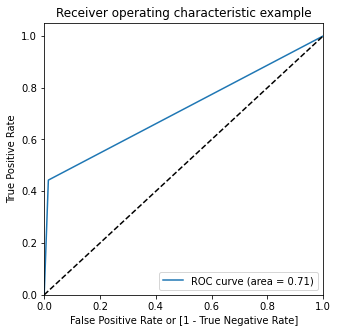

In [152]:
draw_roc_telecom_churn(y_train_telecom_churn, X_train_pred_rfe_telecom_churn)

#### Note : ROC is 0.71

In [153]:
# top 10 features
LR_result_telecom_churn = pd.DataFrame(lr_best_2_telecom_churn.coef_.reshape(50,1), index = col, columns = ['Coef'])
LR_result_telecom_churn.sort_values(by = 'Coef', key = abs, ascending = False).head(10)

,Coef
total_rech_num_8,-0.042486
total_og_mou_8,-0.021182
isd_ic_mou_8,0.018759
total_ic_mou_8,-0.013188
spl_og_mou_8,-0.012751
offnet_mou_8,0.012022
onnet_mou_8,0.010945
std_og_mou_8,0.009901
loc_og_mou_8,0.008963
roam_ic_mou_8,0.007917


## Random forest without PCA (using RFE)

In [154]:
grid_RD_telecom_churn = [
    {   'n_estimators' : [250],
        'max_depth' : [ 7], 
        'max_features' : [20],
        'min_samples_split':[ 4],
    }    
]

gscv2_telecom_churn = RandomizedSearchCV(RandomForestClassifier(random_state = 100, class_weight = 'balanced'), grid_RD_telecom_churn, cv = fold_telecom_churn , scoring = 'accuracy', verbose = 1, n_jobs = -1)

In [155]:
# Fitting the model on train data set
gfit_RD_telecom_churn = gscv2_telecom_churn.fit(X_train_rfe_telecom_churn, y_train_telecom_churn)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [156]:
# Checking score and parameter of the model
print("score : {}".format(gfit_RD_telecom_churn.best_score_))
gfit_RD_telecom_churn.best_params_

score : 0.9126015379686427


{'n_estimators': 250,
 'min_samples_split': 4,
 'max_features': 20,
 'max_depth': 7}

#### Note : Accuracy of the ranfom forest using RFE is 91.26% on test set

In [157]:
# Finding the best estimator
rd_best_2_telecom_churn = gfit_RD_telecom_churn.best_estimator_

In [158]:
# predicting  on train data set
X_train_pred_rfe_rd = rd_best_2_telecom_churn.predict(X_train_rfe_telecom_churn)

In [159]:
# Creating new test data set based on top RFE columns
X_test_new_telecom_churn = X_test_telecom_churn[X_train_rfe_telecom_churn.columns]

In [160]:
# Predicting on the test data set
y_pred_rd_telecom_churn = rd_best_2_telecom_churn.predict(X_test_new_telecom_churn)

In [161]:
# Printing coefficient of the best fit model
print(classification_report(y_test_telecom_churn, y_pred_rd_telecom_churn))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95     13791
           1       0.52      0.82      0.64      1462

    accuracy                           0.91     15253
   macro avg       0.75      0.87      0.79     15253
weighted avg       0.94      0.91      0.92     15253



#### Note : Accuracy of the random forest using RFE is 91.00% on test set

In [162]:
def draw_roc_telecom_churn( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [163]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_telecom_churn, X_train_pred_rfe_rd, drop_intermediate = False )

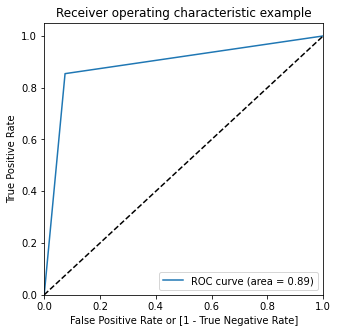

In [164]:
draw_roc_telecom_churn(y_train_telecom_churn, X_train_pred_rfe_rd)

#### Note : ROC is 0.89

## AdaBoost with PCA

In [206]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
# model = AdaBoostClassifier()
# # n_estimators = 50 (default value) 
# # base_estimator = DecisionTreeClassifier (default value)
# model.fit(X_train,y_train)
# preds = model.predict(X_test)
# metrics.accuracy_score(y_test, preds)

In [213]:
# Creating a AdaBoost model 
adaboost_telecom_churn = [
    { 
        'n_estimators': [1200],
        'learning_rate': [0.01],
        'max_depth': [4,5],
        'min_child_weight': [2],
        "class_weight":[{0:1,1:10}, 'balanced' ]
    }    
]

gscv3_adaboost_telecom_churn = RandomizedSearchCV(DecisionTreeRegressor(random_state = 100, tree_method='gpu_hist', predictor='gpu_predictor'), adaboost_telecom_churn, cv = fold_telecom_churn , scoring = 'accuracy', n_jobs = -1, n_iter=20)

NameError: name 'DecisionTreeRegressor' is not defined

In [214]:
# Fitting the model on trained PCs data set
gfit_adaboost_telecom_churn = gscv3_adaboost_telecom_churn.fit(df_train_pca_telecom_churn, y_train_telecom_churn)

ValueError: Invalid parameter 'min_child_weight' for estimator AdaBoostClassifier(n_estimators=1200, random_state=100). Valid parameters are: ['algorithm', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'].

In [123]:
# Checking score and parameter of the model
print("score : {}".format(gfit_adaboost_telecom_churn.best_score_))
adaboostparams_telecom_churn = gfit_adaboost_telecom_churn.best_params_
print(adaboostparams_telecom_churn)

score : 0.9210376383260496
{'n_estimators': 1200, 'min_child_weight': 2, 'max_depth': 5, 'learning_rate': 0.01, 'class_weight': {0: 1, 1: 10}}


#### Note : Accuracy of the xg-boost is 92.09% on train set

In [124]:
adaboost_best_telecom_churn = gfit_adaboost_telecom_churn.best_estimator_

In [125]:
def draw_roc_telecom_churn( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [126]:
# Finding the best model
rf_best_telecom_churn = gfit_adaboost_telecom_churn.best_estimator_

In [127]:
# Finding prediction on the train data set
X_train_pred_xgb_telecom_churn = rf_best_telecom_churn.predict(df_train_pca_telecom_churn)

In [128]:
# Printing coefficient of the best fit model feature
adaboost_best_telecom_churn.feature_importances_

array([0.0615741 , 0.02494167, 0.01261728, 0.01154141, 0.01107573,
       0.02231561, 0.03186895, 0.09633144, 0.01589046, 0.01165327,
       0.01351367, 0.0192772 , 0.01234031, 0.02070801, 0.01130926,
       0.01515041, 0.01950827, 0.01807798, 0.00783344, 0.02687631,
       0.01583129, 0.01632864, 0.00962745, 0.01599334, 0.02062551,
       0.01761337, 0.01581837, 0.00814415, 0.02550426, 0.01290158,
       0.0138364 , 0.01314172, 0.02044852, 0.01037369, 0.01126382,
       0.00710257, 0.01439089, 0.01105956, 0.00959852, 0.00917931,
       0.01063936, 0.01052379, 0.01219215, 0.01162278, 0.01438629,
       0.01475555, 0.00980378, 0.01009989, 0.00621405, 0.00844313,
       0.00857231, 0.00885797, 0.01070387, 0.0173851 , 0.0103358 ,
       0.00836318, 0.00966984, 0.01099732, 0.01004874, 0.00858963,
       0.01348839, 0.01079402, 0.00733335, 0.01299195], dtype=float32)

In [129]:
# Predicting on the PCs test data set
y_pred_xgb_telecom_churn = adaboost_best_telecom_churn.predict(df_test_pca_telecom_churn)

In [130]:
# Printing the confusion matrix
print(confusion_matrix(y_test_telecom_churn, y_pred_xgb_telecom_churn))

[[13505   286]
 [  935   527]]


In [131]:
#Printing the model report on the train and test data set after PCA
print(classification_report(y_test_telecom_churn, y_pred_xgb_telecom_churn))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     13791
           1       0.65      0.36      0.46      1462

    accuracy                           0.92     15253
   macro avg       0.79      0.67      0.71     15253
weighted avg       0.91      0.92      0.91     15253



#### Note : Accuracy of the xg-boost is 92.00% on test set

## Finding ROC(Receiver operating characteristic) of XGBoost with PCA model

In [132]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_telecom_churn, X_train_pred_xgb_telecom_churn, drop_intermediate = False )

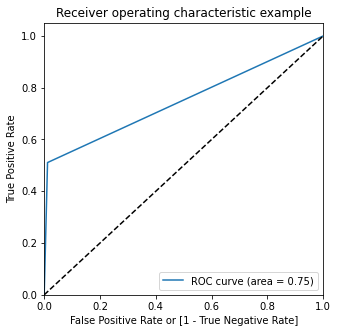

In [133]:
draw_roc_telecom_churn(y_train_telecom_churn, X_train_pred_xgb_telecom_churn)

#### Note : ROC is 0.75

In [165]:
# top 20 features

<h2>Recommendations</h2>
<p>Below are the top 20 features:-</p>

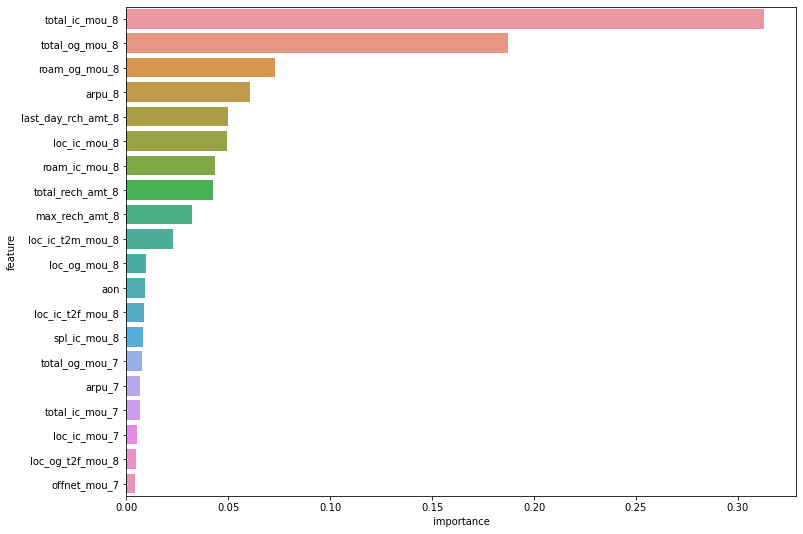

In [166]:
rf_df_telecom_churn = pd.DataFrame({'feature' : X_train_rfe_telecom_churn.columns, 'importance' : rd_best_2_telecom_churn.feature_importances_})
rf_df_telecom_churn = rf_df_telecom_churn.sort_values(by = 'importance', ascending = False).head(20)
fig = plt.figure(figsize = (12, 9))
sns.barplot(data = rf_df_telecom_churn, y = 'feature', x = 'importance')
plt.show()

<h3>Model Insights</h3>

1. Accuracy of logistic regression is 91.65% on train set
2. Accuracy of logistic regression is 92.00% on test set
3. Accuracy of random forest is 84.88% on train set
4. Accuracy of random forest is 85% on test set
5. Accuracy of xg-boost is 92.09% on train set
6. Accuracy of xg-boost is 92.00% on test set
7. Accuracy of logistic regression using RFE is 93.30% on train set
8. Accuracy of logistic regression using RFE is 93.00% on test set
9. Accuracy of ranfom forest using RFE is 91.26% on test set
10. Accuracy of random forest using RFE is 91.00% on test set

<h3>*As per our analysis xg-boost and Random forest produce best accuracy and models can be selected to predict churn data for future dataset or production.</h3>

## Prediction on test data

In [167]:
df_telecom_churn_test = scaler_telecom_churn.transform(df_telecom_churn_test)

In [168]:
df_telecom_churn_test_pca = pca_avg_telecom_churn.transform(df_telecom_churn_test)

In [200]:
y_pred_final = xgb_best_telecom_churn.predict(df_telecom_churn_test_pca)

In [201]:
solution = pd.read_csv('solution (1).csv')
solution.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


In [202]:
solution['churn_probability'] = y_pred_final

In [203]:
solution['churn_probability'].value_counts()

0    28369
1     1631
Name: churn_probability, dtype: int64

In [204]:
submission = solution.to_csv('submission.csv', index=False)

In [205]:
solution.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0
